In [2]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.algorithms.optimizers import COBYLA, SPSA, ADAM
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks, helstrom_bound, random_quantum_state
import matplotlib.pyplot as plt

[0.48681640625, 0.46728515625, 0.45703125, 0.4140625, 0.38916015625, 0.3662109375, 0.35546875, 0.32177734375, 0.28369140625, 0.279296875, 0.2548828125, 0.22265625, 0.2001953125, 0.17431640625, 0.171875, 0.1376953125, 0.126953125, 0.10888671875, 0.087890625, 0.07666015625, 0.056640625, 0.08251953125, 0.03271484375, 0.03466796875, 0.0224609375, 0.0126953125, 0.0068359375, 0.0029296875, 0.00146484375, 0.43115234375]


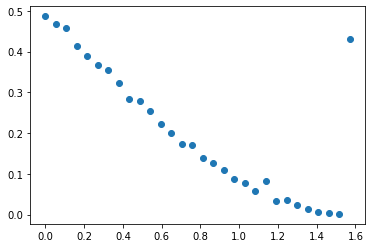

In [22]:
th=np.linspace(0.,pi/2,num =30)
err=[]
for theta in th:
    state0 = np.array([ 1, 0])
    state1 = np.array([np.cos(theta), np.sin(theta)])
    # Parameters
    th_u, fi_u, lam_u = [0], [0], [0]
    th1, th2  = [0], [pi]
    th_v1, th_v2 = [0], [0]
    fi_v1, fi_v2 = [0], [0]
    lam_v1, lam_v2 = [0],  [0]

    params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
    # Initialize Discriminator
    discriminator = StateDiscriminativeQuantumNeuralNetworks([state0, state1],0,1)

    # Calculate cost function
    results = discriminator.discriminate(SPSA(100), params)[1]
    err.append(results)
print(err)
fig, ax = plt.subplots()
#Dibujar puntos
ax.scatter(th[:],err[:])


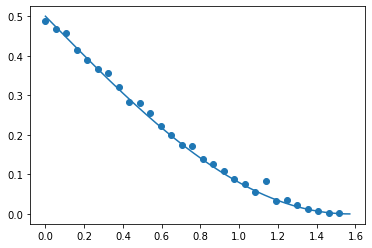

In [25]:
fig, ax = plt.subplots()
#Dibujar puntos
ax.scatter(th[:-1],err[:-1])
#Predicción teórica
th_t=np.linspace(0.,pi/2,num =1000)
err_t=[]
for theta in th_t:
    state0 = np.array([ 1, 0])
    state1 = np.array([np.cos(theta), np.sin(theta)])
    err_t.append(helstrom_bound(state0,state1))
plt.plot(th_t,err_t)